# Natural Language Processing

NLP refers to computational techniques involving language.  It's a broad field, but we'll look at a few techniques both simple and not simple.  One approach to visualizing words and counts is word clouds, which artistically lay out the words with sizes proportional to their counts.  Generally, data scientists don't think much of word clouds, in large part because the placement of the words doesn't mean anything other than "Here's some space where I was able to fit a word."

If you ever are forced to create a word cloud, think about whether you can make the axes convey something.  For example, imagine that for each of some collection of data science related buzzwords, you have two numbers between 0 and 100.  The first representing how frequently it appears in job postings, the second how frequently it appears in job postings, the second how frequently it appears on resumes:

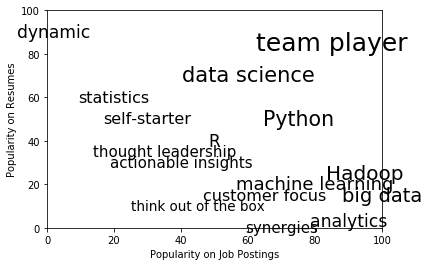

In [5]:
import math, random, re
from collections import defaultdict, Counter
from bs4 import BeautifulSoup
import requests
from matplotlib import pyplot as plt

def plot_resumes():
    data = [ ("big data", 100, 15), ("Hadoop", 95, 25), ("Python", 75, 50),
         ("R", 50, 40), ("machine learning", 80, 20), ("statistics", 20, 60),
         ("data science", 60, 70), ("analytics", 90, 3),
         ("team player", 85, 85), ("dynamic", 2, 90), ("synergies", 70, 0),
         ("actionable insights", 40, 30), ("think out of the box", 45, 10),
         ("self-starter", 30, 50), ("customer focus", 65, 15),
         ("thought leadership", 35, 35)]

    def text_size(total):
        """equals 8 if total is 0, 28 if total is 200"""
        return 8 + total / 200 * 20

    for word, job_popularity, resume_popularity in data:
        plt.text(job_popularity, resume_popularity, word,
                 ha='center', va='center',
                 size=text_size(job_popularity + resume_popularity))
    plt.xlabel("Popularity on Job Postings")
    plt.ylabel("Popularity on Resumes")
    plt.axis([0, 100, 0, 100])
    plt.show()
    
plot_resumes()

We'll use `requests` and `BeautifulSoup` to retrieve the data.  There are a couple of issues worth calling attention to.  The first is that the apostrophes in the text are actually the Unicode chatacter u"\u2019".  We'll create a helper function to replace them with normal apostrophes:

In [6]:
def fix_unicode(text):
    return text.replace(u"\u2019", "'")

The second issue is that once we get the tesxt of the web page, we'll want to split it into a sequence of words and periods (so that we can tell where sentences end).  We can do this using `re.finall()`:

In [10]:
def get_document():

    url = "http://radar.oreilly.com/2010/06/what-is-data-science.html"
    html = requests.get(url).text
    soup = BeautifulSoup(html, 'html5lib')

    content = soup.find("div", "article-body")         # find article-body div
    regex = r"[\w']+|[\.]"                             # matches a word or a period

    document = []


    for paragraph in content("p"):
        words = re.findall(regex, fix_unicode(paragraph.text))
        document.extend(words)

    return document

document = get_document()
print(document)

["We've", 'all', 'heard', 'it', 'according', 'to', 'Hal', 'Varian', 'statistics', 'is', 'the', 'next', 'sexy', 'job', '.', 'Five', 'years', 'ago', 'in', 'What', 'is', 'Web', '2', '.', '0', 'Tim', "O'Reilly", 'said', 'that', 'data', 'is', 'the', 'next', 'Intel', 'Inside', '.', 'But', 'what', 'does', 'that', 'statement', 'mean', 'Why', 'do', 'we', 'suddenly', 'care', 'about', 'statistics', 'and', 'about', 'data', 'In', 'this', 'post', 'I', 'examine', 'the', 'many', 'sides', 'of', 'data', 'science', 'the', 'technologies', 'the', 'companies', 'and', 'the', 'unique', 'skill', 'sets', '.', 'The', 'web', 'is', 'full', 'of', 'data', 'driven', 'apps', '.', 'Almost', 'any', 'e', 'commerce', 'application', 'is', 'a', 'data', 'driven', 'application', '.', "There's", 'a', 'database', 'behind', 'a', 'web', 'front', 'end', 'and', 'middleware', 'that', 'talks', 'to', 'a', 'number', 'of', 'other', 'databases', 'and', 'data', 'services', 'credit', 'card', 'processing', 'companies', 'banks', 'and', 'so',

We certainly could clean this data further.  There is still some amount of extraneous text in the document.  Now that we have the text as a sequence of words, we can model language in the following way: given sopme starting word (say "book") we look at all the words that follow it in the source documents.  We rtandomly choose one of these to be the next word, and we repeat the process until we get to a period, which signifies the end of the sentence.  We call this a *bigram* model, as it is dtermined completely by the frequencies of the bigrams (word pairs) in the original data.

What about a starting word?  We can just pick randomly from words that follow a period.  To start, let's precompute the possible word transitions.  Recall that `zip` stops when any of its inputs is done, so that `zip(document, document[1:])` gives us precisely the pairs of consecutive elements of `document`:

In [11]:
def generate_using_bigrams(transitions):
    current = "."   # this means the next word will start a sentence
    result = []
    while True:
        next_word_candidates = transitions[current]    # bigrams (current, _)
        current = random.choice(next_word_candidates)  # choose one at random
        result.append(current)                         # append it to results
        if current == ".": return " ".join(result)     # if "." we're done
        
bigrams = list(zip(document, document[1:]))
transitions = defaultdict(list)
for prev, current in bigrams:
    transitions[prev].append(current)
random.seed(0)
print("bigram sentences")
for i in range(10):
    print(i, generate_using_bigrams(transitions))
print()

bigram sentences
0 But that's going to be current to generate a large searches correlates what that can be saying you can you want to figure out what's important role in enabling agile practices are then combine entrepreneurship with hundreds of track titles artists album .
1 CDDB views music by Jeff Hammerbacher said on the Philadelphia County by analyzing musical problem isn't the relational database .
2 If anything from machine consumable .
3 It was probably generated by their path .
4 Roger Magoulas who runs the metadata track titles .
5 The result .
6 Amazon understands that nobody remembers says that nobody remembers says that gave them open source R is really necessary for working with gathering data collection tools like the ability to be nice if it necessary to do data scientists particularly physicists rather than for distributing an audio stream processing companies banks and other disciplines it arrives and are easier to use .
7 Point of them open source the low 1 The Turk 

The sentences it produces are gibberish, but they're the kind of gibberish you might put on your website if you were trying to sound data-sciencey.  We can make the sentences less gibberishy by looking at trigrams, triplets of consecutive words.  More generally, you might look at n-grams consisting of n consecutive words, but three will be plenty for us.  Now the transitions will depend on the previous two words:

In [13]:
def generate_using_trigrams(starts, trigram_transitions):
    current = random.choice(starts)   # choose a random starting word
    prev = "."                        # and precede it with a '.'
    result = [current]
    while True:
        next_word_candidates = trigram_transitions[(prev, current)]
        next = random.choice(next_word_candidates)

        prev, current = current, next
        result.append(current)

        if current == ".":
            return " ".join(result)

trigrams = list(zip(document, document[1:], document[2:]))
trigram_transitions = defaultdict(list)
starts = []

for prev, current, next in trigrams:

    if prev == ".":              # if the previous "word" was a period
        starts.append(current)   # then this is a start word

    trigram_transitions[(prev, current)].append(next)

print("trigram sentences")
for i in range(10):
    print(i, generate_using_trigrams(starts, trigram_transitions))
print()

trigram sentences
0 At O'Reilly we frequently combine publishing industry .
1 Her job as scientist at bit .
2 Edward Tufte's Visual Display of Quantitative Information is the heart of what might be interesting .
3 Information platforms are similar to traditional data warehouses but different .
4 Her job as scientist at LinkedIn .
5 Even a relatively small simple program that looked at members' profiles and made recommendations accordingly .
6 It has excellent graphics facilities CRAN includes parsers for many kinds of data science .
7 Data conditioning can involve cleaning up messy HTML with tools like Beautiful Soup natural language processing fails you can split your task up into smaller problems .
8 If you have a strong mathematical background computing skills and come from a number of cores .
9 Whether we're talking about web server logs tweet streams online transaction records citizen science data from Nielsen BookScan with our own sales data publicly available Amazon data and eve

Notice that now we have to track the starting words separately.  We can generate sentences in pretty much the same way.  Of course, they sound better because at each step the generation process has fewer choices and at many steps only a single choice.  This means that you frequently generate sentences (or at least long phrases) that were seen verbatim in the original data.  Having more data would help; it would also work better if you collected n-grams from pultiple essays about data science.

A different approach to modeling language is with grammars, rules for generating acceptable sentences.  In elementary school, you probably learned about parts speech and how to combine them.  For example, if you had a really bad English teacher, you might say that a sentence necessarily consists of a noun followed by a verb.  If you then have a list of nouns and verbs, you can generate sentences according to the rule.  We'll define a slightly more complicated grammar:

In [14]:
grammar = {
    "_S"  : ["_NP _VP"],
    "_NP" : ["_N",
             "_A _NP _P _A _N"],
    "_VP" : ["_V",
             "_V _NP"],
    "_N"  : ["data science", "Python", "regression"],
    "_A"  : ["big", "linear", "logistic"],
    "_P"  : ["about", "near"],
    "_V"  : ["learns", "trains", "tests", "is"]
}

I made up the convention that names starting with underscores refer to rules that need further expanding, and that other names are terminals that don't need further processing.  So, for example, `"_S"` is the "sentence" rule, which produces a `"_NP"` ("noun phrase") rule followed by a `"_VP"` ("verb phrase") rule.  The verb phrase rule can produce either the `"_V"` ("verb") rule, or the verb rule followed by the noun phrase rule.

Notice that the `"_NP"` rule contains itself in one of its productions.  Grammars can be recursive, which allows even finit grammars like this to generate infinitely many different sentences.  How do we generate sentences from this grammar?  We'll start with a list containing the sentence rule `["_S"]`.  And then we'll repeatedly expand each rule by replacing it with a randomly chosen one of its prroductions.  We stop when we have a list consisting solely of the terminals.  For example, one such progression might look like:

```python
['_S']
['_NP', '_VP']
['_N', '_VP']
['Python', '_VP']
['Python', '_V', '_NP']
['Python', 'trains', '_NP']
['Python', 'trains', '_A', '_NP', '_P', '_A', '_N']
['Python', 'trains', 'logistic', '_NP', '_P', '_A', '_N']
['Python', 'trains', 'logistic', '_N', '_P', '_A', '_N']
['Python', 'trains', 'logistic', 'data science', '_P', '_A', '_N']
['Python', 'trains', 'logistic', 'data science', 'about', '_A', '_N']
['Python', 'trains', 'logistic', 'data science', 'about', 'logistic', '_N']
['Python', 'trains', 'logistic', 'data science', 'about', 'logistic', 'Python']
```

How do we implement this?  Well, to start, we'll create a simple helper function to identify terminals:

In [15]:
def is_terminal(token):
    return token[0] != "_"

Next, we need to write a function to turn a list of tokens into a sentence.  We'll look for the first nonterminal token.  If we can't find one, that means we have a completed sentence and we're done.  If we do find a nonterminal, then we randomly choose one of its productions.  If that production is a terminal (ie a word), we simply replace the token with it.  Otherwise it's a sequence of space-separated nonterminal tokens that we need to split and then splice into the current tokens.  Either way, we repeat the process on the new set of tokens.  Putting it all together, we get:

In [17]:
def expand(grammar, tokens):
    for i, token in enumerate(tokens):

        # ignore terminals
        if is_terminal(token): continue

        # choose a replacement at random
        replacement = random.choice(grammar[token])

        if is_terminal(replacement):
            tokens[i] = replacement
        else:
            tokens = tokens[:i] + replacement.split() + tokens[(i+1):]
        return expand(grammar, tokens)

    # if we get here we had all terminals and are done
    return tokens

And now we can start generating sentences:

In [19]:
def generate_sentence(grammar):
    return expand(grammar, ["_S"])

generate_sentence(grammar)

['big', 'regression', 'about', 'big', 'data science', 'learns']

Grammars are actually more interesting when they are used in the other direction.  Given a sentence we can use a grammar to parse the sentence.  This then allows us to identify subjects and verbs and helps us to make sense of the sentence.  Using data science to generate text is a neat trick; using it to understand text is more magical.

Generating samples from some distributions is easy.  We can get uniform random variables with:

```python
random.random()
```

and normal random variables with:

```python
inverse_normal_cdf(random.random())
```

But some distributions are harder to sample from.  Gibbs sampling is a technique for generating samples from multidimensional distributions when we only know some of the conditional distributions.  For example, imagine rolling two dice.  Let `x` be the value of the first die and `y` be the sum of the dice, and imagine you wanted to generate lots of (x, y) pairs.  In this case, it's easy to generate the samples directly:

In [20]:
def roll_a_die():
    return random.choice([1,2,3,4,5,6])

def direct_sample():
    d1 = roll_a_die()
    d2 = roll_a_die()
    return d1, d1 + d2

But imagine that you only knew the conditional distributions.  The distribution of `y` conditional on `x` is easy.  If you know the value of `x, y` is equally liekly to be $ x + 1, x + 2, x + 3, x + 4, x + 5 $ or $ x + 6 $:

In [21]:
def random_y_given_x(x):
    """equally likely to be x + 1, x + 2, ... , x + 6"""
    return x + roll_a_die()

The other direction is more complicated.  For example, if you know that y is 2, then necessarily x is 1.  If you know y is 3, then x is equally likely to be 1 or 2.  Similarly, if y is 11, then x has to be either 5 or 6:

In [22]:
def random_x_given_y(y):
    if y <= 7:
        # if the total is 7 or less, the first die is equally likely to be
        # 1, 2, ..., (total - 1)
        return random.randrange(1, y)
    else:
        # if the total is 7 or more, the first die is equally likely to be
        # (total - 6), (total - 5), ..., 6
        return random.randrange(y - 6, 7)

The way Gibbs, sampling works is that we start with any valid value for x and y and then repeatedly alternate replacing x with a random value picked conditional on y and replacing y with a random value picked conditional on x.  After a number of iterations, the resulting values of x and y will represent a sample from the unconditional joint distribution:

In [25]:
def gibbs_sample(num_iters=100):
    x, y = 1, 2 # doesn't really matter
    for _ in range(num_iters):
        x = random_x_given_y(y)
        y = random_y_given_x(x)
    return x, y

gibbs_sample()

(5, 6)

You can check that this gives similar results to the direct sample:

In [27]:
def compare_distributions(num_samples=1000):
    counts = defaultdict(lambda: [0, 0])
    for _ in range(num_samples):
        counts[gibbs_sample()][0] += 1
        counts[direct_sample()][1] += 1
    return counts

compare_distributions()

defaultdict(<function __main__.compare_distributions.<locals>.<lambda>()>,
            {(1, 6): [32, 27],
             (2, 4): [20, 28],
             (5, 6): [24, 32],
             (5, 8): [23, 23],
             (5, 9): [26, 29],
             (1, 2): [26, 28],
             (4, 5): [36, 34],
             (6, 8): [26, 28],
             (2, 6): [23, 35],
             (4, 10): [23, 34],
             (1, 3): [35, 26],
             (2, 3): [31, 20],
             (3, 6): [37, 38],
             (3, 7): [31, 21],
             (2, 7): [32, 23],
             (4, 7): [34, 21],
             (2, 8): [29, 29],
             (5, 7): [30, 18],
             (5, 11): [33, 29],
             (1, 4): [21, 35],
             (6, 9): [27, 33],
             (5, 10): [33, 27],
             (6, 11): [24, 26],
             (6, 10): [22, 31],
             (1, 5): [35, 20],
             (6, 12): [24, 29],
             (4, 9): [23, 23],
             (3, 9): [21, 27],
             (2, 5): [34, 44],
             (3, 5):

A more sophisticated approach to understanding our users' interests might try to identify the topics that underly those interests.  A technique called *Latent Dirichlet Analysis* (LDA) is commonly used to identify common topics in a set of documents.  We'll apply it to documents that consists of each user's interests.

LDA has some similarities to the Naive Bayes Classifier, in that it assumes a probabilistic model for documents.  We'll gloss over the hairier mathematical details, but for our purposes the model assumes that:

- There is some fixed number K of topics.
- There is a random variable that assigns each topic an associated probability distribution over words.  You should think of this distribution as the probability of seeing word w given topic k.
- There is another random variable that assigns each document a probability distribution over topics.  You should think of this distribution as the mixture of topics in document d.
- Each word in a document was generated by first randomly picking a topic (from the document's distribution of topics) and then randomly picking a word (from the topic's distribution of words).

In particular, we have a collection of documents each of which is a list of words.  And we have a corresponding collection of `document_topics` that assigns a topic (here a number between 0 and K - `1) to each word in each document.

So that the fifth word in the fourth document is:

```python
documents[3][4]
```

and the topic from which that word was chosen is:

```python
document_topics[3][4]
```

This very explicitly defines the likelihood that topic 1 produces a certain word by comparing how many times topic 1 produces that word with how many times topic 1 produces any word.  Although these topics are not just numbers, we can give them descriptive names by looking at the words on which they put the heaviest weight.  We just have to somehow generate the `document_topics`.  This is where Gibbs sampling comes into play.

We start by assigning every word in every document a topic completely at random.  Now we go through each document one word at a time.  For that word and document, we construct weights for each topic that depend on the current distribution of topics in that document and the current distribution of words for that topic.  We then use those weights to sample a new topic for that word.  If we iterate this process many times, we will end up with a joint sample from the topic-word distribution and the document-topic distribution.

To start with, we'll need a function to randomly choose an index based on an arbitrary set of weights:

In [28]:
def sample_from(weights):
    total = sum(weights)
    rnd = total * random.random()       # uniform between 0 and total
    for i, w in enumerate(weights):
        rnd -= w                        # return the smallest i such that
        if rnd <= 0: return i           # sum(weights[:(i+1)]) >= rnd

For instance, if you give it weights `[1, 1, 3]` then one fifth of the time it will return 0, one fifth of the time it will return 1, and three fifths of the time it will return 2.

Our documents are our users' interests, which look like:

In [29]:
documents = [
    ["Hadoop", "Big Data", "HBase", "Java", "Spark", "Storm", "Cassandra"],
    ["NoSQL", "MongoDB", "Cassandra", "HBase", "Postgres"],
    ["Python", "scikit-learn", "scipy", "numpy", "statsmodels", "pandas"],
    ["R", "Python", "statistics", "regression", "probability"],
    ["machine learning", "regression", "decision trees", "libsvm"],
    ["Python", "R", "Java", "C++", "Haskell", "programming languages"],
    ["statistics", "probability", "mathematics", "theory"],
    ["machine learning", "scikit-learn", "Mahout", "neural networks"],
    ["neural networks", "deep learning", "Big Data", "artificial intelligence"],
    ["Hadoop", "Java", "MapReduce", "Big Data"],
    ["statistics", "R", "statsmodels"],
    ["C++", "deep learning", "artificial intelligence", "probability"],
    ["pandas", "R", "Python"],
    ["databases", "HBase", "Postgres", "MySQL", "MongoDB"],
    ["libsvm", "regression", "support vector machines"]
]

K = 4

In order to calculate the sampling weights, we'll need to keep track of several counts.  Let's first create the data structures for them.  How many times each topic is assigned to each document:

In [30]:
document_topic_counts = [Counter()
                         for _ in documents]

How many times each word is assigned to each topic:

In [31]:
topic_word_counts = [Counter() for _ in range(K)]

The total number of words assigned to each topic:

In [32]:
topic_counts = [0 for _ in range(K)]

The total number of words contained in each document:

In [33]:
document_lengths = [len(d) for d in documents]

The number of distinct words:

In [36]:
distinct_words = set(word for document in documents for word in document)
W = len(distinct_words)

And the number of documents:

In [37]:
D = len(documents)

For example, once we populate these, we can find the number of words in `docuements[3]` associated with topic 1 as:

In [38]:
document_topic_counts[3][1]

0

And we can find the number of times *nlp* is associated with topic 2 as:

In [39]:
topic_word_counts[2]["nlp"]

0

Now we're ready to define our conditional probability functions.  Each has a smoothing term that ensures every topic has a nonzero chance of being chosen nin any document and that every word has a nonzero chance of being chosen for any topic:

In [40]:
def p_topic_given_document(topic, d, alpha=0.1):
    """the fraction of words in document _d_
    that are assigned to _topic_ (plus some smoothing)"""

    return ((document_topic_counts[d][topic] + alpha) /
            (document_lengths[d] + K * alpha))

def p_word_given_topic(word, topic, beta=0.1):
    """the fraction of words assigned to _topic_
    that equal _word_ (plus some smoothing)"""

    return ((topic_word_counts[topic][word] + beta) /
            (topic_counts[topic] + W * beta))

def topic_weight(d, word, k):
    """given a document and a word in that document,
    return the weight for the k-th topic"""

    return p_word_given_topic(word, k) * p_topic_given_document(k, d)

def choose_new_topic(d, word):
    return sample_from([topic_weight(d, word, k)
                        for k in range(K)])

We'll use these to create the weights for updating topics.  There are solid mathematical reasons why `topic_weight` is defined the way it is, but their details would lead us too far afield.  Hopefully it makes at least intuitive sense that given a word and its document, the likelihood of any topic choice depends on both how likely that topic is for the docuemnt and how likely that word is for the topic.

This is all the machinery we need.  We start by assigning every word to a random topic and populating our coutners appropriately:

In [41]:
random.seed(0)
document_topics = [[random.randrange(K) for word in document]
                   for document in documents]

for d in range(D):
    for word, topic in zip(documents[d], document_topics[d]):
        document_topic_counts[d][topic] += 1
        topic_word_counts[topic][word] += 1
        topic_counts[topic] += 1

Our goal is to get a joint sample of the topics-words distribution and the documents-topics distribution.  We do this using a form of Gibbs sampling that uses the conditional probabilities defined previouslyt:

In [42]:
for iter in range(1000):
    for d in range(D):
        for i, (word, topic) in enumerate(zip(documents[d],
                                              document_topics[d])):

            # remove this word / topic from the counts
            # so that it doesn't influence the weights
            document_topic_counts[d][topic] -= 1
            topic_word_counts[topic][word] -= 1
            topic_counts[topic] -= 1
            document_lengths[d] -= 1

            # choose a new topic based on the weights
            new_topic = choose_new_topic(d, word)
            document_topics[d][i] = new_topic

            # and now add it back to the counts
            document_topic_counts[d][new_topic] += 1
            topic_word_counts[new_topic][word] += 1
            topic_counts[new_topic] += 1
            document_lengths[d] += 1

What are the topics?  They're just numbers 0, 1, 2, and 3.  If we want names for them we have to do that ourselves:

In [44]:
for k, word_counts in enumerate(topic_word_counts):
    for word, count in word_counts.most_common():
        if count > 0: print(k, word, count)

topic_names = ["Big Data and programming languages",
               "databases",
               "machine learning",
               "statistics"]

for document, topic_counts in zip(documents, document_topic_counts):
    print(document)
    for topic, count in topic_counts.most_common():
        if count > 0:
            print(topic_names[topic], count)
    print()

0 Java 3
0 Big Data 3
0 Hadoop 2
0 HBase 1
0 C++ 1
0 Spark 1
0 Storm 1
0 programming languages 1
0 MapReduce 1
0 Cassandra 1
0 deep learning 1
1 HBase 2
1 neural networks 2
1 Postgres 2
1 MongoDB 2
1 machine learning 2
1 Cassandra 1
1 numpy 1
1 decision trees 1
1 deep learning 1
1 databases 1
1 MySQL 1
1 NoSQL 1
1 artificial intelligence 1
1 scipy 1
2 regression 3
2 Python 2
2 R 2
2 libsvm 2
2 scikit-learn 2
2 mathematics 1
2 support vector machines 1
2 Haskell 1
2 Mahout 1
3 statistics 3
3 probability 3
3 Python 2
3 R 2
3 pandas 2
3 statsmodels 2
3 C++ 1
3 artificial intelligence 1
3 theory 1
['Hadoop', 'Big Data', 'HBase', 'Java', 'Spark', 'Storm', 'Cassandra']
Big Data and programming languages 7

['NoSQL', 'MongoDB', 'Cassandra', 'HBase', 'Postgres']
databases 5

['Python', 'scikit-learn', 'scipy', 'numpy', 'statsmodels', 'pandas']
databases 2
machine learning 2
statistics 2

['R', 'Python', 'statistics', 'regression', 'probability']
statistics 3
machine learning 2

['machine learn